In [21]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

#### Leitura dos dados

In [22]:
dados = pd.read_csv("turnover.csv")

#### Dimensão da base e features

In [23]:
dados.shape

(14999, 10)

In [24]:
dados.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


#### Descritiva básica

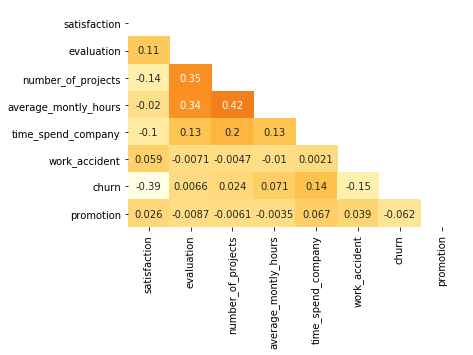

In [25]:
matriz = np.triu(dados.corr())
sns.heatmap(dados.corr(), annot = True, cmap = 'YlOrBr', mask = matriz, cbar = False)

In [26]:
dados.churn.value_counts()/len(dados)*100

0    76.191746
1    23.808254
Name: churn, dtype: float64

In [27]:
dados.describe()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


#### Variaveis categóricas

In [8]:
dados = dados.join(pd.get_dummies(dados.department))
dados.drop("department", axis = 1, inplace = True)
dados.drop("management", axis = 1, inplace = True)

In [9]:
salarios = {"salary":  {"low": 1, "medium": 2, "high": 3}}
dados.replace(salarios, inplace=True)

In [10]:
dados.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,salary,IT,RandD,accounting,hr,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,2,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,2,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,1,0,0


#### Separar os dados em treino e teste

In [28]:
variavel_resposta = dados.churn
dados.drop('churn', axis = 1, inplace = True)

In [29]:
dados_treino, dados_teste, resposta_treino, resposta_teste = train_test_split(dados, variavel_resposta, test_size=0.20, random_state=42)

#### Criação do modelo

In [30]:
arvore_decisao = DecisionTreeClassifier(max_depth = 4, random_state = 42, min_samples_leaf = 100)

In [31]:
arvore_decisao.fit(dados_treino, resposta_treino)

ValueError: could not convert string to float: 'low'

In [15]:
predicao_treino = arvore_decisao.predict(dados_treino)
predicao_teste = arvore_decisao.predict(dados_teste)

#### Avaliação no Treino/Teste

In [16]:
# Função de visualização proposta em: https://github.com/DTrimarchi10/confusion_matrix

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

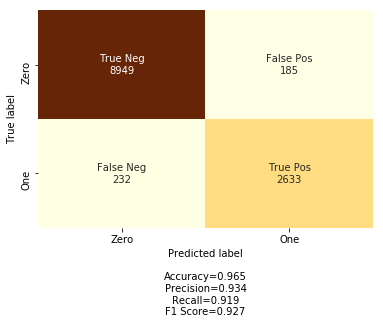

In [17]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(confusion_matrix(resposta_treino, predicao_treino), group_names=labels,
                      categories=categories, cmap='YlOrBr', cbar = False, percent = False)

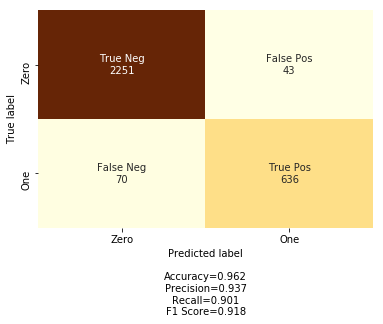

In [18]:
labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero', 'One']
make_confusion_matrix(confusion_matrix(resposta_teste, predicao_teste), group_names=labels,
                      categories=categories, cmap='YlOrBr', cbar = False, percent = False)

#### Plotar a árvore e avaliar a importância de cada feature

[Text(1086.5,2044.8,'satisfaction <= 0.465\ngini = 0.364\nsamples = 11999\nvalue = [9134, 2865]\nclass = y[0]'),
 Text(530,1590.4,'number_of_projects <= 2.5\ngini = 0.477\nsamples = 3354\nvalue = [1315, 2039]\nclass = y[1]'),
 Text(318,1136,'evaluation <= 0.575\ngini = 0.217\nsamples = 1390\nvalue = [172, 1218]\nclass = y[1]'),
 Text(212,681.6,'satisfaction <= 0.365\ngini = 0.102\nsamples = 1282\nvalue = [69, 1213]\nclass = y[1]'),
 Text(106,227.2,'gini = 0.392\nsamples = 116\nvalue = [31, 85]\nclass = y[1]'),
 Text(318,227.2,'gini = 0.063\nsamples = 1166\nvalue = [38, 1128]\nclass = y[1]'),
 Text(424,681.6,'gini = 0.088\nsamples = 108\nvalue = [103, 5]\nclass = y[0]'),
 Text(742,1136,'satisfaction <= 0.115\ngini = 0.487\nsamples = 1964\nvalue = [1143, 821]\nclass = y[0]'),
 Text(636,681.6,'gini = 0.0\nsamples = 728\nvalue = [0, 728]\nclass = y[1]'),
 Text(848,681.6,'average_montly_hours <= 270.5\ngini = 0.139\nsamples = 1236\nvalue = [1143, 93]\nclass = y[0]'),
 Text(742,227.2,'gini =

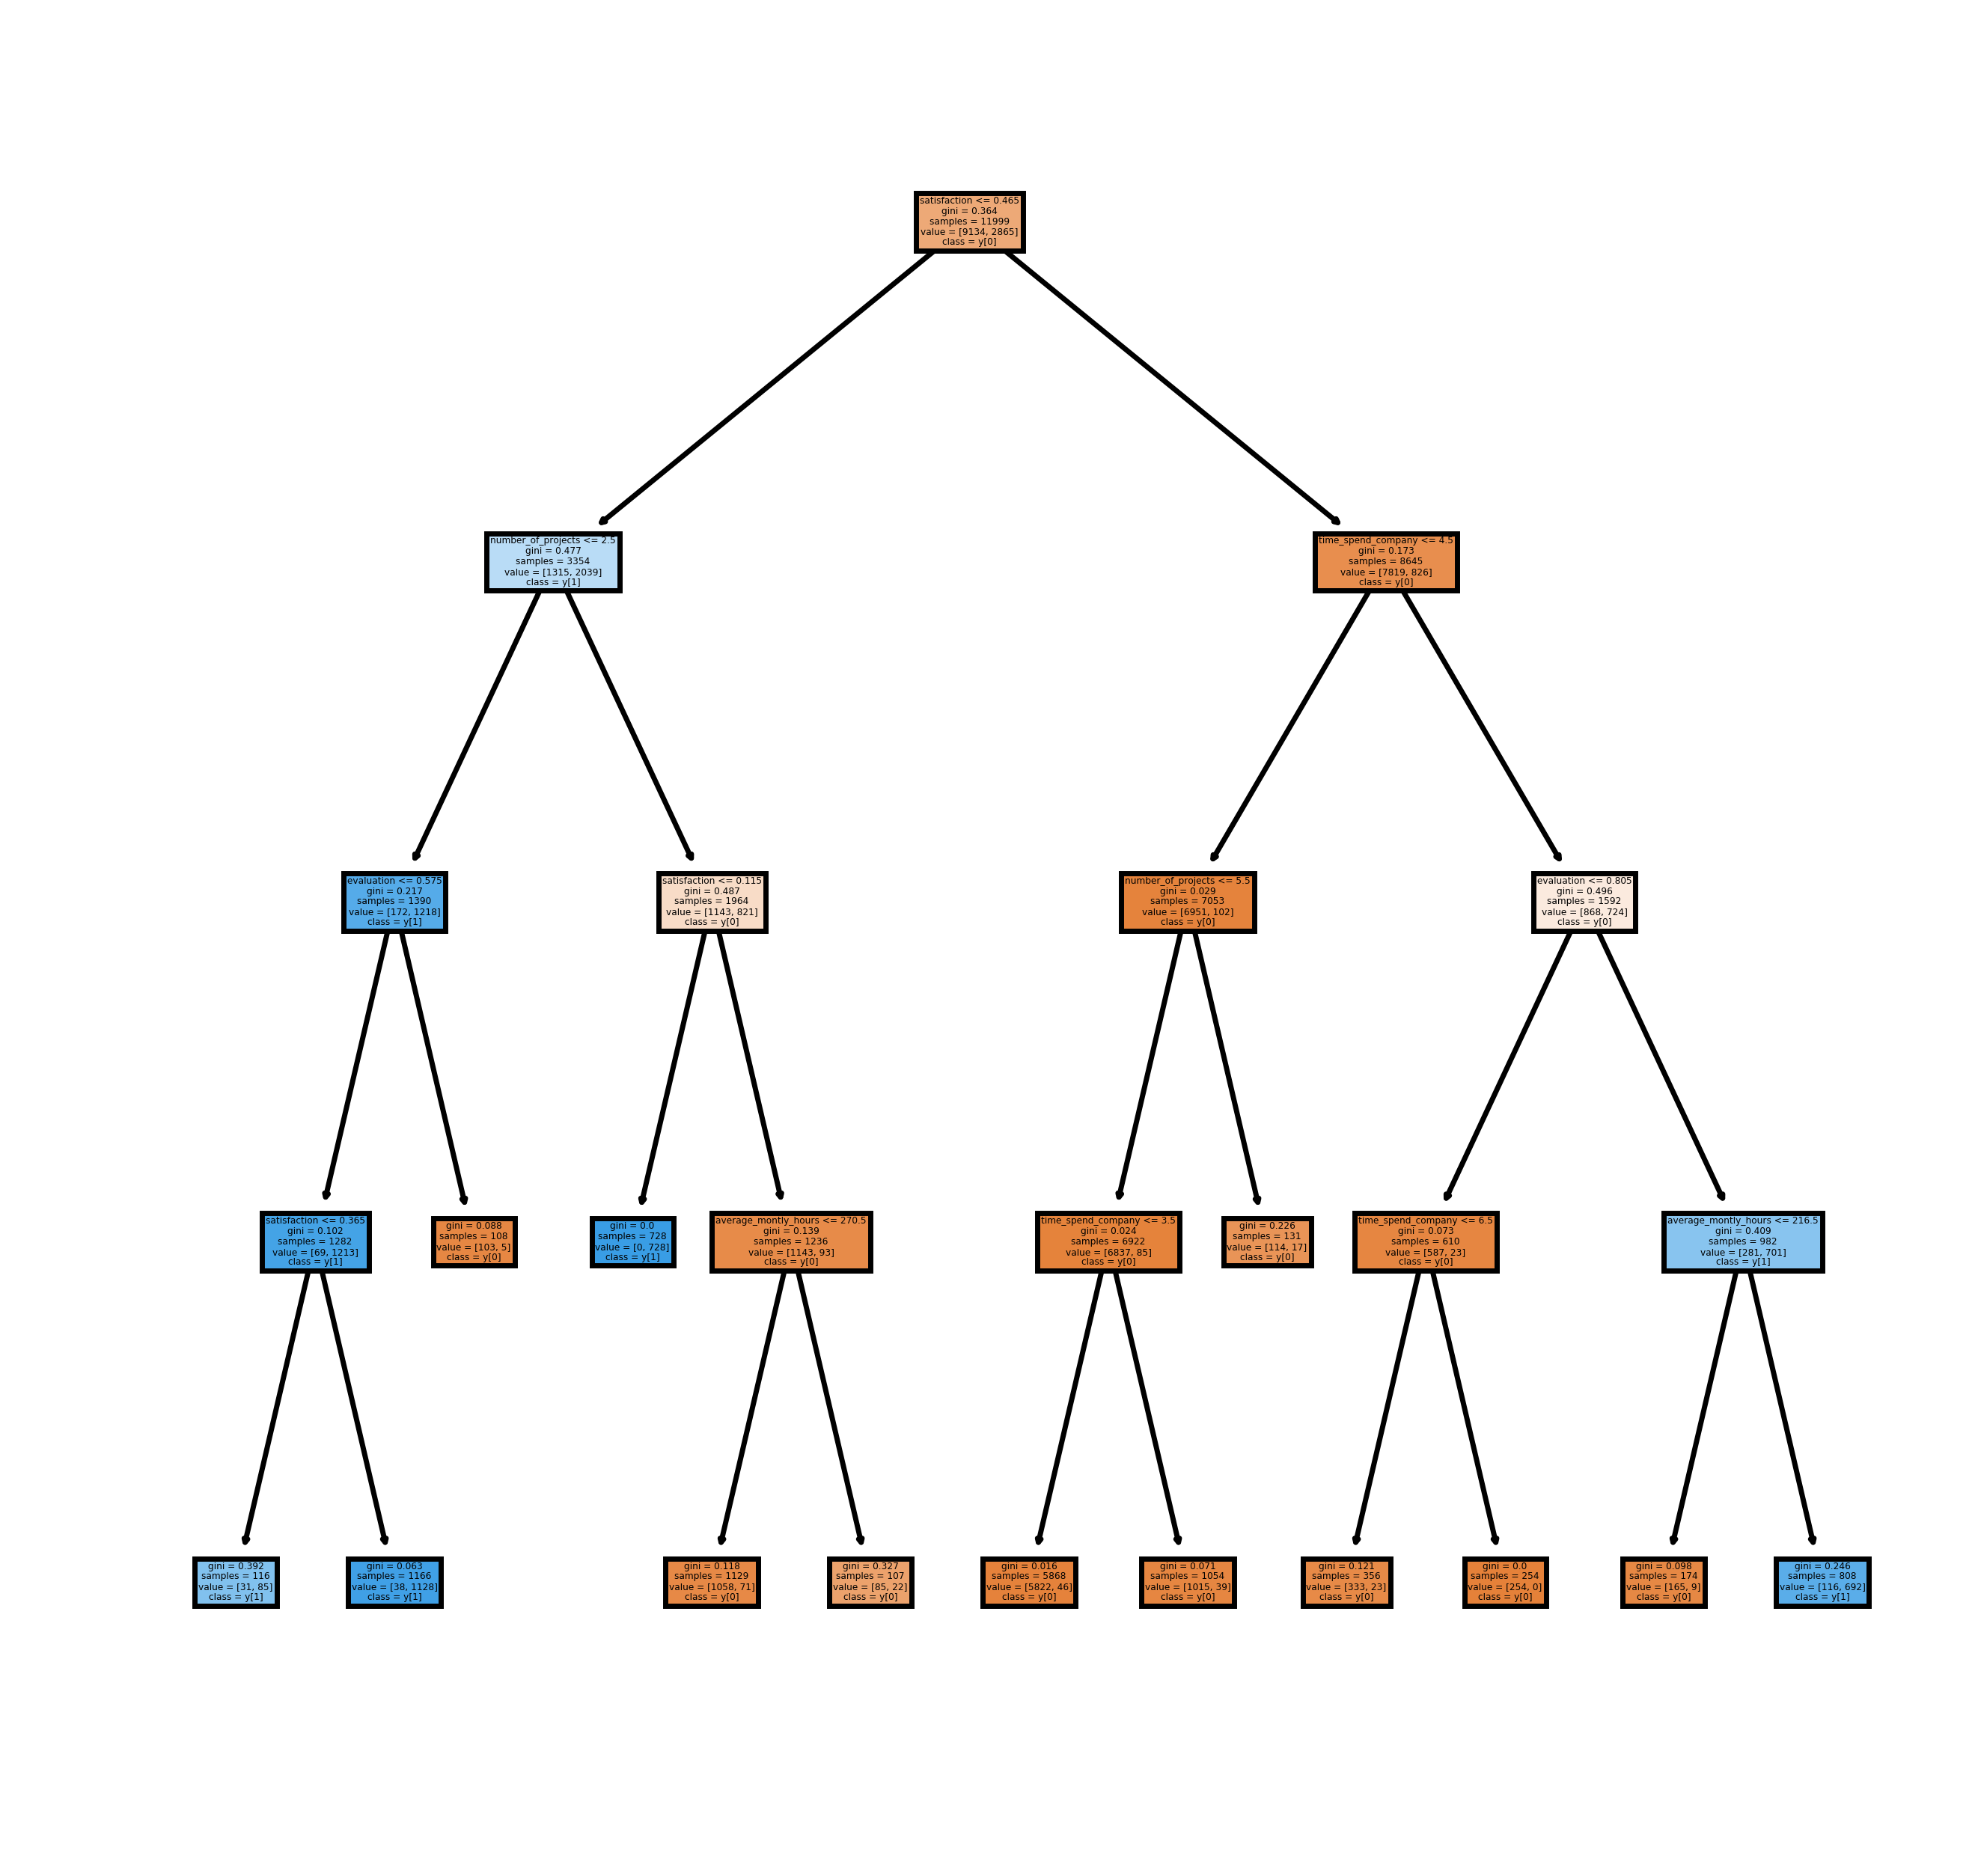

In [19]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=500)
plot_tree(arvore_decisao,feature_names = dados.columns, class_names = True, filled = True)

In [20]:
ft_importance = dict(zip(dados.columns, arvore_decisao.feature_importances_))
resultado = pd.DataFrame([ft_importance.keys(), ft_importance.values()]).T
resultado.columns = ["feature","importance"]
resultado.sort_values(by = "importance", ascending = False, inplace = True)
resultado["importance"] = resultado["importance"]*100
display(resultado)

,feature,importance
0,satisfaction,57.167
4,time_spend_company,14.0249
1,evaluation,13.9968
2,number_of_projects,9.56556
3,average_montly_hours,5.2458
11,hr,0
15,support,0
14,sales,0
13,product_mng,0
12,marketing,0
